## Plotting

The only thing required for this animation to work is to install something called _ffmpeg_ for your Python installation. You do this with the following line:

##### Import relevant libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

##### Display the objective function plot in the background

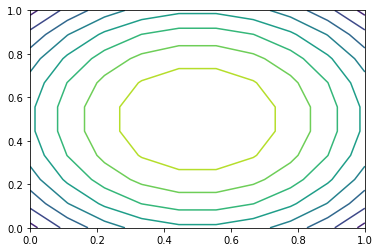

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 1))

line, = ax.plot([], [], marker="*", color="r", linestyle="None");

#add a background
x = np.linspace(0,1,10)
y = np.linspace(0,1,10)
z = np.zeros([10,10])
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        z[i,j] = (x[i] - 0.5)**2 + (y[j] - 0.5)**2

x1,x2 = np.meshgrid(x,y);
background = ax.contour(x1, x2, -z, 8); #, cmap="gray")

##### Define the animation function

In [3]:
x_init = np.random.rand(50)
y_init = np.random.rand(50)

# animation function. This is called sequentially
def animate(i):
    np.random.seed(0)
    x = x_init + np.random.rand(x_init.shape[0])*0.05*np.sin(i/5)
    y = y_init + np.random.rand(x_init.shape[0])*0.05*np.cos(i/5)
    line.set_data(x, y)
    return (line,)

##### Initialise then instantiate the animation

In [4]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

##### Tracer le graphique

In [5]:
HTML(anim.to_html5_video())

$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$
$$$$

## PSO algorithm



In [28]:
class Swarm():
    
    def __init__(self,n_parts,n_dims):
        self.positions = np.random.rand(n_parts,n_dims)
        self.part_best = self.positions
        self.glob_best = self.current_best()
        
    def Objective(self, m_positions):
        centre = 0.5*np.ones(m_positions.shape)
        return np.sum((m_positions - centre)**2, axis=1)
        
    def current_best(self):
        vals = self.Objective(self.positions)
        return np.min(vals)   

In [29]:
my_swarm = Swarm(10,2)

In [30]:
my_swarm.glob_best

0.00010467727524767333

In [ ]:
def init():
    swarm = np.random.rand(10,2)
    line.set_data(swarm[:,0], swarm[:,1])
    return (line,)